# Use-Case 2 Settlement Detection

In [3]:
import sys
sys.path.append("..")

import os
import numpy as np
import matplotlib.pyplot as plt

from represent.datamodules.uc2_settlement_module import SettlementDataset, sample_batch
import matplotlib.pyplot as plt
from skimage.exposure import equalize_hist

from scipy.stats import skewcauchy

## Concept

we sample a target image from a certain location (below) for testing and train a model on similar settlements and negatives from the surrounding areas. There is a certain buffer around the target image that ensures we do not train a model on images of this target image

## The image below is the target (query) image to classify

/data/RepreSent/UC2/Test/37LBL/mosaik/B01.jp2 exists. skipping. specify overwrite=True to regenerate mosaik
/data/RepreSent/UC2/Test/37LBL/mosaik/B02.jp2 exists. skipping. specify overwrite=True to regenerate mosaik
/data/RepreSent/UC2/Test/37LBL/mosaik/B03.jp2 exists. skipping. specify overwrite=True to regenerate mosaik
/data/RepreSent/UC2/Test/37LBL/mosaik/B04.jp2 exists. skipping. specify overwrite=True to regenerate mosaik
/data/RepreSent/UC2/Test/37LBL/mosaik/B05.jp2 exists. skipping. specify overwrite=True to regenerate mosaik
/data/RepreSent/UC2/Test/37LBL/mosaik/B06.jp2 exists. skipping. specify overwrite=True to regenerate mosaik
/data/RepreSent/UC2/Test/37LBL/mosaik/B07.jp2 exists. skipping. specify overwrite=True to regenerate mosaik
/data/RepreSent/UC2/Test/37LBL/mosaik/B08.jp2 exists. skipping. specify overwrite=True to regenerate mosaik
/data/RepreSent/UC2/Test/37LBL/mosaik/B8A.jp2 exists. skipping. specify overwrite=True to regenerate mosaik
/data/RepreSent/UC2/Test/37L

100%|█████████████████████████████████████████| 696/696 [00:25<00:00, 27.39it/s]


dropping 22 invalid samples


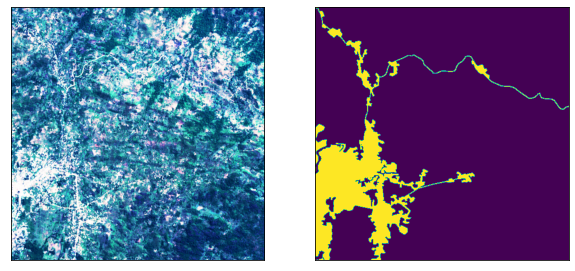

In [4]:
ds = SettlementDataset("/data/RepreSent/UC2", "37LBL", segmentation=True)

target_index = 200
ds.imagesize=5120
X,Y,georeference= ds[target_index]


fig, axs = plt.subplots(1,2, figsize=(2*5,5))
axs[0].imshow(equalize_hist(X[np.array([3,2,1])]).transpose(1,2,0))
axs[1].imshow(Y)

for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

## Support Dataset

### Classification

In [6]:

# CLASSIFICATION
ds = SettlementDataset("/data/RepreSent/UC2", "37LBL", segmentation=False)
X,Y = sample_batch(ds, target_index=200, num_shots=(5,5))

fig, axs = plt.subplots(1, X.shape[0], figsize=(3*X.shape[0], 3))
for x,y, ax in zip(X,Y, axs):
    ax.imshow(equalize_hist(x[np.array([3, 2, 1])]).transpose(1, 2, 0))
    ax.set_title("settlement" if y == 1 else "non-settlement")
    ax.set_xticks([])
    ax.set_yticks([])

/data/RepreSent/UC2/Test/37LBL/mosaik/B01.jp2 exists. skipping. specify overwrite=True to regenerate mosaik
/data/RepreSent/UC2/Test/37LBL/mosaik/B02.jp2 exists. skipping. specify overwrite=True to regenerate mosaik
/data/RepreSent/UC2/Test/37LBL/mosaik/B03.jp2 exists. skipping. specify overwrite=True to regenerate mosaik
/data/RepreSent/UC2/Test/37LBL/mosaik/B04.jp2 exists. skipping. specify overwrite=True to regenerate mosaik
/data/RepreSent/UC2/Test/37LBL/mosaik/B05.jp2 exists. skipping. specify overwrite=True to regenerate mosaik
/data/RepreSent/UC2/Test/37LBL/mosaik/B06.jp2 exists. skipping. specify overwrite=True to regenerate mosaik
/data/RepreSent/UC2/Test/37LBL/mosaik/B07.jp2 exists. skipping. specify overwrite=True to regenerate mosaik
/data/RepreSent/UC2/Test/37LBL/mosaik/B08.jp2 exists. skipping. specify overwrite=True to regenerate mosaik
/data/RepreSent/UC2/Test/37LBL/mosaik/B8A.jp2 exists. skipping. specify overwrite=True to regenerate mosaik
/data/RepreSent/UC2/Test/37L

100%|█████████████████████████████████████████| 696/696 [00:11<00:00, 62.72it/s]
/home/marc/projects/represent/venv/lib/python3.8/site-packages/numpy/core/shape_base.py:420: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arrays = [asanyarray(arr) for arr in arrays]


dropping 22 invalid samples


/home/marc/projects/represent/venv/lib/python3.8/site-packages/numpy/core/shape_base.py:121: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


ValueError: could not broadcast input array from shape (5,13,64,64) into shape (5,)

### Segmentation

In [ ]:
# SEGMENTATION
plt.tight_layout()
plt.show()

ds = SettlementDataset("/data/RepreSent/UC2", "37LBL", segmentation=True)
X,Y,georeferences = sample_batch(ds, target_index=200, num_shots=(5,5))

fig, axs = plt.subplots(2, X.shape[0], figsize=(3*X.shape[0], 3*2))
for x,y, axs_row in zip(X,Y, axs.T):
    ax = axs_row[0]
    ax.imshow(equalize_hist(x[np.array([3, 2, 1])]).transpose(1, 2, 0))
    ax.set_xticks([])
    ax.set_yticks([])

    ax = axs_row[1]
    ax.imshow(y)
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

## Details on the sampling of the support dataset

we use a skewed cauchy distribution centered on 

In [ ]:
x = np.linspace(0, 50000, 100)

rv = skewcauchy(a=0.999, loc=5000, scale=10000)
fig, ax = plt.subplots()
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')
ax.set_xlabel("distance to target [m]")
ax.set_ylabel("probability of sampling a training image")


In [ ]:
ds = SettlementDataset("/data/RepreSent/UC2", "37LBL", segmentation=False)
pos_batch, selected_idxs, p = sample_settlements(ds, target_index=200, return_idx_p=True)

In [ ]:
fig, ax = plt.subplots(figsize=(22,22))
ds.index["probability"] = p
ds.index.plot(column="probability", ax=ax)
ds.index.iloc[selected_idxs].plot(ax=ax, color="orange")

c = ds.index.iloc[target_index].geometry.centroid
ax.scatter(c.x, c.y, color="red", s=300)